In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

%matplotlib inline

In [2]:
def load_data(directory, file_name, names=None, header=None, skiprows=0):
    return pd.read_excel(os.path.join(directory, file_name), names=names, header=header, skiprows=skiprows, skipinitialspace=True)

In [3]:
def load_csv_data(directory, file_name, names=None, header=None, skiprows=0, skipinitialspace=True):
    return pd.read_csv(os.path.join(directory, file_name), names=names, header=header, skiprows=skiprows, skipinitialspace=skipinitialspace)

In [4]:
def using_model(model, scoring, cv):
    print("****************** {} ******************".format(model))
    if scoring is not None:
        scores_ = cross_val_score(model, X_train, Y_train, scoring=scoring, cv=cv)
        print("scoring={} cv={}".format(scoring, cv), scores_.mean(), scores_.std())
    model.fit(X_train, Y_train)
    Y_predict = model.predict(X_test)
    print("accuracy_score=", accuracy_score(Y_test, Y_predict))
    print("precision_score=", precision_score(Y_test, Y_predict, average='micro'))
    print("recall_score=", recall_score(Y_test, Y_predict, average='micro'))

In [5]:
def confusion_matrix(model, X_train, Y_train):
    from sklearn.metrics import confusion_matrix

    y_scores_ = cross_val_predict(model, X_train, Y_train, cv=3, method="decision_function")
    model.fit(X_train, Y_train)
    Y_predict = model.predict(X_train)
    conf_mx = confusion_matrix(Y_train, Y_predict)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
#     print("accuracy_score=", accuracy_score(Y_train, Y_predict))
#     print("precision_score=", precision_score(Y_train, Y_predict))
#     print("recall_score=", recall_score(Y_train, Y_predict))
    print(lb.classes_)
    print(lb.transform(lb.classes_))
    print(conf_mx)
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums

    np.fill_diagonal(norm_conf_mx, 0)
    plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

In [6]:
base_directory = '~/workspace/personal/datasets/DryBeanDataset'

columns = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 
           'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1',
           'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']


In [7]:
dry_bean_df = pd.read_excel(os.path.join(base_directory, 'Dry_Bean_Dataset.xlsx'))
print(list(dry_bean_df))

print(dry_bean_df['Class'].unique())

['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']
['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


In [8]:
result = OrdinalEncoder().fit_transform(dry_bean_df[['Class']])
np.unique(result)

array([0., 1., 2., 3., 4., 5., 6.])

In [9]:
# plt.scatter(dry_bean_df['Area'], dry_bean_df['Perimeter'], alpha=0.5, c=)
# plt.show()


#dry_bean_df.plot(kind='scatter', x='Perimeter', y='EquivDiameter', alpha=0.2, c=result, figsize=(30,15))

In [10]:
# pd.plotting.scatter_matrix(dry_bean_df.drop(
#     ['Class', 'AspectRation', 'Eccentricity', 'Compactness', 'MinorAxisLength', 'EquivDiameter', 'ConvexArea', 'Perimeter'],
#     axis=1), alpha=0.2, figsize=(40, 80), c=result)

In [11]:
dry_bean_df = dry_bean_df.drop(['AspectRation', 'Eccentricity', 'Compactness', 'MinorAxisLength', 'EquivDiameter', 'ConvexArea', 'Perimeter'],
                 axis=1)

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 

for train_index, test_index in split.split(dry_bean_df, dry_bean_df["Class"]):
        train_set = dry_bean_df.loc[train_index]
        test_set = dry_bean_df.loc[test_index]

In [13]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

ct = ColumnTransformer([
        ("norm2", num_pipeline, list(dry_bean_df.drop(['Class'], axis=1)))
])

lb = LabelEncoder()

X_train_set = train_set.drop(['Class'], axis=1)
Y_train_set = train_set['Class'].copy()

X_test_set = test_set.drop(['Class'], axis=1)
Y_test_set = test_set['Class'].copy()

X_train = ct.fit_transform(X_train_set)
Y_train = lb.fit_transform(Y_train_set)

X_test = ct.fit_transform(X_test_set)
Y_test = lb.fit_transform(Y_test_set)

In [49]:
m = LogisticRegression(max_iter=500, multi_class="multinomial").fit(X_train, Y_train)

In [56]:
y1 = m.predict(X_test)

In [58]:
(y1 == Y_test).size

2723

In [59]:
(y1 != Y_test).size

2723

In [62]:
X_test[y1 != Y_test].size

1980

### Cross Validate with decision function

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
[0 1 2 3 4 5 6]
[[ 962    0   56    0    4    6   29]
 [   0  418    0    0    0    0    0]
 [  35    0 1233    0   21    1   14]
 [   2    0    0 2604    5   43  183]
 [   2    0   23   13 1476    0   28]
 [  13    0    1   21    0 1535   51]
 [   4    0    5  180   40   30 1850]]


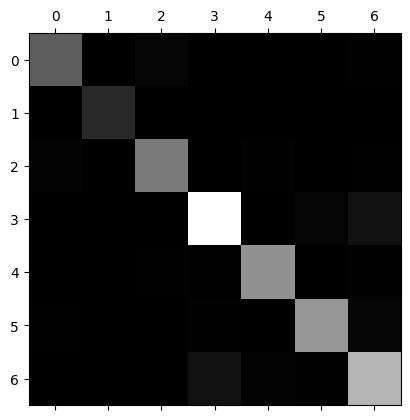

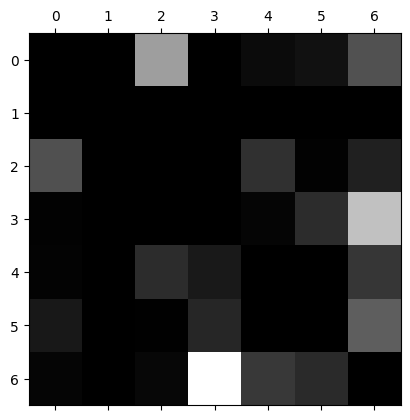

In [14]:
confusion_matrix(LogisticRegression(max_iter=500, multi_class="multinomial"), X_train, Y_train)

In [15]:
using_model(LogisticRegression(max_iter=500, multi_class="multinomial"), 'accuracy', cv=10)

****************** LogisticRegression(max_iter=500, multi_class='multinomial') ******************
scoring=accuracy cv=10 0.9251479534651326 0.00676592173407716
accuracy_score= 0.9192067572530297
precision_score= 0.9192067572530297
recall_score= 0.9192067572530297


In [22]:
using_model(DecisionTreeClassifier(), None, cv=10)

#confusion_matrix(SGDClassifier(), X_train, Y_train)

****************** DecisionTreeClassifier() ******************
accuracy_score= 0.8957032684539111
precision_score= 0.8957032684539111
recall_score= 0.8957032684539111


In [44]:
using_model(DecisionTreeClassifier(max_features='sqrt', splitter='best'), None, cv=10)

****************** DecisionTreeClassifier(max_features='sqrt') ******************
accuracy_score= 0.8879911861917004
precision_score= 0.8879911861917004
recall_score= 0.8879911861917004


In [ ]:
using_model(RandomForestClassifier(), None, cv=10)

In [ ]:
using_model(SGDClassifier(), None, cv=10)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

using_model(KNeighborsClassifier(), None, 10)

In [65]:
ovr = OneVsRestClassifier(SVC())

using_model(ovr, None, 10)

****************** OneVsRestClassifier(estimator=SVC()) ******************
accuracy_score= 0.927653323540213
precision_score= 0.927653323540213
recall_score= 0.927653323540213


In [ ]:
using_model(AdaBoostClassifier(), None, 10)

In [63]:
a = AdaBoostClassifier(DecisionTreeClassifier(max_depth=15), n_estimators=225, 
                       algorithm="SAMME.R", learning_rate=0.3)
using_model(a, None, 10)

****************** AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=15),
                   learning_rate=0.3, n_estimators=225) ******************
accuracy_score= 0.9272860815277267
precision_score= 0.9272860815277267
recall_score= 0.9272860815277267


In [64]:

a1 = AdaBoostClassifier(LogisticRegression(max_iter=500, multi_class="multinomial"),
                        n_estimators=225, algorithm="SAMME.R", learning_rate=0.3)
using_model(a1, None, 10)

****************** AdaBoostClassifier(estimator=LogisticRegression(max_iter=500,
                                                multi_class='multinomial'),
                   learning_rate=0.3, n_estimators=225) ******************
accuracy_score= 0.8446566287183254
precision_score= 0.8446566287183254
recall_score= 0.8446566287183254


In [66]:
a2 = AdaBoostClassifier(ovr,
                        n_estimators=225, algorithm="SAMME.R", learning_rate=0.3)
using_model(a2, None, 10)


****************** AdaBoostClassifier(estimator=OneVsRestClassifier(estimator=SVC()),
                   learning_rate=0.3, n_estimators=225) ******************


TypeError: AdaBoostClassifier with algorithm='SAMME.R' requires that the weak learner supports the calculation of class probabilities with a predict_proba method.
Please change the base estimator or set algorithm='SAMME' instead.